## 粒子群算法
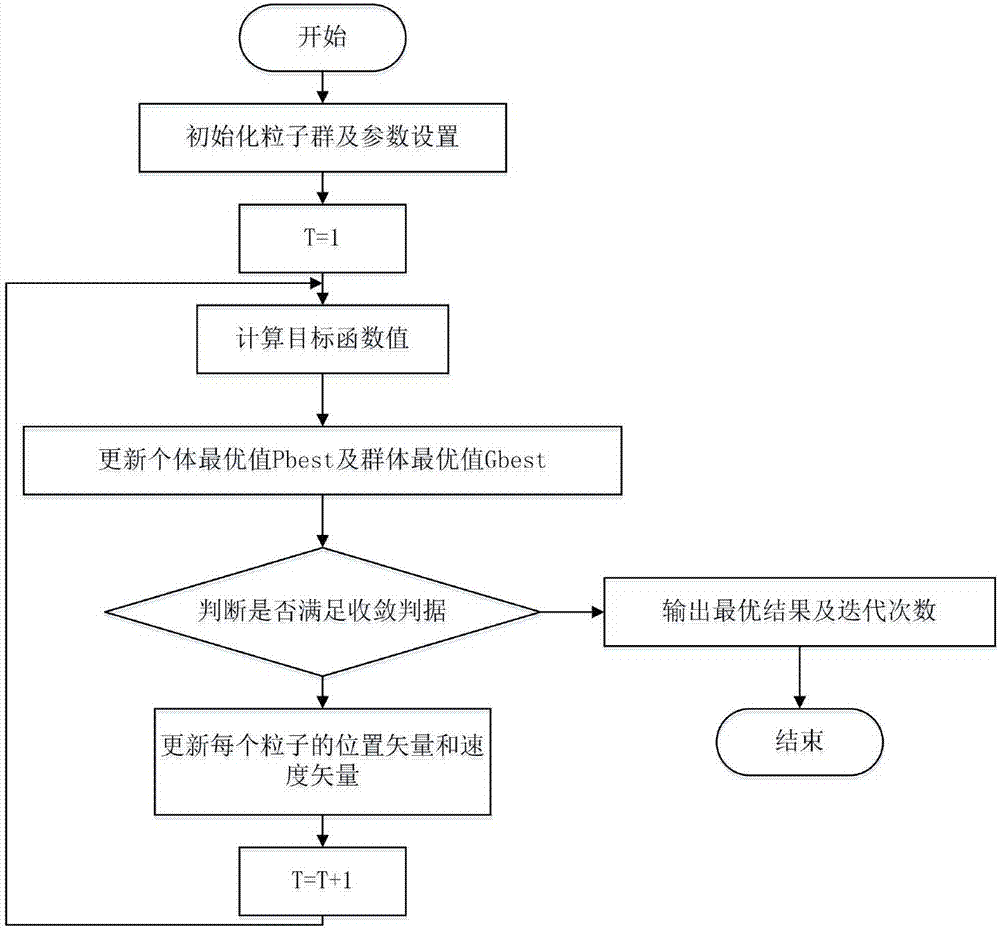

#### 迭代公式：
$$ v^{t+1}_i = w_iv^t_i + c_1*rand()*(pbest^t_i - x^t_i) + c_2*rand()*(gbest^t_i - x^t_i) $$  
$$ x^{t+1}_i = x^t_i + v^{t+1}_i $$


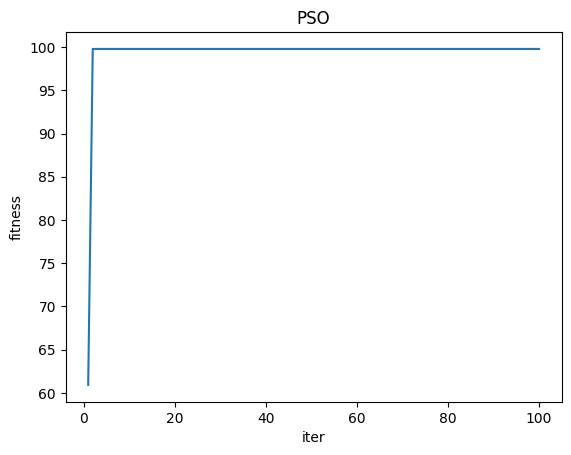

max_fitness: 99.78430604376302


In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D

# 初始化的参数
'''
k:迭代次数
D:维度(自变量个数)
N:粒子总数
K:最大迭代次数
'''
w_max = 0.9
w_min = 0.4
N = 100
c1 = 2
c2 = 2
D = 2
K = 100
x_bound = [-10,10]
y_bound = [-10,10]
v_max = 1
v_min = -1


# 目标函数
def F(x, y):

    num = 6.452 * (x + 0.125 * y) * (np.cos(x) - np.cos(2*y)) ** 2
    den = np.sqrt(0.8 + (x - 4.2) ** 2 + 2 * (y - 7) ** 2)
    return num / den + 3.226 * y



# 线性递减权值策略
def cal_weight(k):
    w = w_max - k*(w_max - w_min)/K
    return w

def iter(i,k,p_best_history,g_best_history):
    # 更新pbest
    fitness = F(allind_x[i,k,0],allind_x[i,k,1])
    if fitness > p_best_history[i]:
        p_best_history[i] = fitness
    # 更新gbest
    gbest_idx = np.argmax(p_best_history)
    g_best_history[k] = p_best_history[gbest_idx]
    
def get_new(allind_v,allind_x,i,k):
    # 速度更新
    allind_v[i,k+1,:] = cal_weight(k) * allind_v[i,k,:] + \
                        c1 * random.random() * ( p_best_history[i] - allind_x[i,k,:]) + \
                        c2 * random.random() * (g_best_history[k] - allind_x[i,k,:])
    # 速度边界条件
    allind_v[i,k+1,:] = np.clip(allind_v[i,k+1,:],v_min,v_max)
    # 位置更新
    allind_x[i,k+1,:] = allind_x[i,k,:] + allind_v[i,k+1,:]
    # 位置边界条件
    allind_x[i,k+1,:] = np.clip(allind_x[i,k+1,:],x_bound[0],x_bound[1])

# 随机产生粒子群
allind_x = np.ones(shape=(N,K,D))
allind_v = np.ones(shape=(N,K,D))

# 储存个体最优值->func_value
p_best_history = np.ones(shape=(N,1))

# 储存群体最优值->func_value
g_best_history = np.ones(shape=(K,1))


# PSO迭代
for k in range(K):
    for i in range(N):

        if k == 0:
            # 随机产生初始解->第0代
            allind_x[i,k,0] = x_bound[0] + (x_bound[1] - x_bound[0]) * random.random() 
            allind_x[i,k,1] = y_bound[0] + (y_bound[1] - y_bound[0]) * random.random()

            allind_v[i,k,:] =  np.random.rand(D) * (v_max - v_min) + v_min

            # 储存:个体-群体
            p_best_history[i] = F(allind_x[i,k,0], allind_x[i,k,1])

            gbest_idx = np.argmax(p_best_history)
            g_best_history[k] = p_best_history[gbest_idx]

            get_new(allind_v,allind_x,i,k)

        elif k >= 1 and k < (K-1):

            iter(i,k,p_best_history,g_best_history)
            get_new(allind_v,allind_x,i,k)
            
        
        elif k == K-1:
            iter(i,k,p_best_history,g_best_history)
# 绘图
plt.plot(range(1,K+1),g_best_history)
plt.xlabel('iter')
plt.ylabel('fitness')
plt.title('PSO')
plt.show()

# 输出最优值
max_fitness = np.max(g_best_history)
print('max_fitness:',max_fitness)


#### sko库
https://scikit-opt.github.io/

best_x is [0.01672254 0.03241186 0.5       ] best_y is [0.25058899]


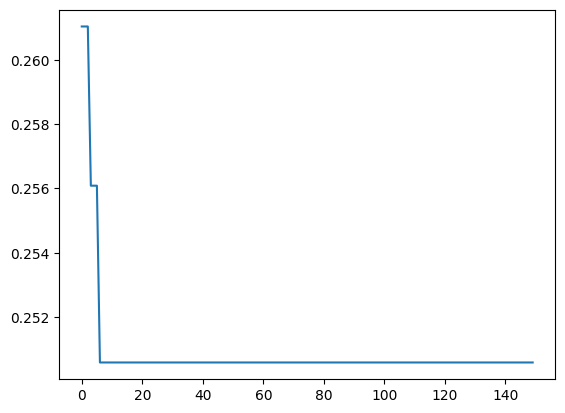

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sko.PSO import PSO

def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2

# Function to update w linearly
def update_w(iter, max_iter, w_min=0.4, w_max=0.9):
    return w_max - (w_max - w_min) * (iter / max_iter)

# Initialize PSO with given parameters
pso = PSO(func=demo_func, dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1],w=0.8,c1=0.5, c2=0.5)

# # Run the PSO algorithm, updating w at each iteration
for iter in range(pso.max_iter):
    pso.w = update_w(iter, pso.max_iter)  # Update inertia weight
    pso.run(1)  # Perform one iteration of the PSO algorithm

# Output results
print('best_x is', pso.gbest_x, 'best_y is', pso.gbest_y)
plt.plot(pso.gbest_y_hist)
plt.show()
